### Imports and "global variables" definition

In [185]:
import os
import json

import numpy as np
import pandas as pd
import collections as c
import plotly.express as px
import matplotlib.pyplot as plt

import UserBuilder
import import_ipynb

from pathlib import Path
from pprint import pprint

ans_dict = {"A":0, "B":1, "C":2, "D":3, "E":4}
graphs_path = "./graphs/"

os.makedirs(graphs_path + "all_freqs", exist_ok=True)
os.makedirs(graphs_path + "attentive_freqs", exist_ok=True)

### Functions definition
This function gets the frequency of labels in an answer for all the answers and the "correct answer" rate.<br>
It takes a series of users and return a tuple of frequencies of answers and correct rates per answer.

In [186]:
def freqsNrates(userseries):
    answers_freqs = []
    answers_rates = []
    #for index in range(len(users_factory.users_built[0].))
    for index in (userseries[0].questions_dict).keys():
        freqs, rates = filtered_users.answers_freqs(index, userseries)
        answers_freqs.append(freqs)
        answers_rates.append(rates)
    return answers_freqs, answers_rates

This function plots the graph of the answers frequencies for a given question. <br>
If someone gave the correct answer, then it's shown in yellow.

In [187]:
def frequencies_plot(question_num, answers_freqs, path):
    correct = UserBuilder.correct_answers[question_num + 1]
    w = c.Counter(answers_freqs[question_num])
    plt.title("Question {}".format(question_num + 1))
    barlist = plt.bar(w.keys(), w.values())
    ## Calculate 
    if question_num+1 != 17:
        print([x for x in ans_dict.keys()][ans_dict[correct]])
        print(answers_freqs[question_num])
        if ([x for x in ans_dict.keys()][ans_dict[correct]] in answers_freqs[question_num]):
            try:
                barlist[ans_dict[correct]].set_color("y")
            except:
                pass
    title = "Question " + str(question_num + 1) + ".png"
    plt.savefig(fname=path + title)
    plt.show()

### Json dataset opening
Also checking the length of the survey elements

In [188]:
with open('dataset.json', 'r') as f:
    survey = json.load(f)

In [189]:
len(survey)

56

### Instantiating the a UserBuilder object
Making it build a series of users and returns itself at each iteration.<br>
If for some reason a survey is broken, it eliminates it and goes on.

In [190]:
users_factory = UserBuilder.UserBuilder()

In [191]:
for index in range(len(survey)):
    try:
        users_factory, _ = users_factory.survey_parser(survey[index])
    except:
        print(index)
        pass

21
34
50


### Instantiating an object that is basically the list of users built by the factory
From there, it filters the attentive users that answered correctly at the attention check.<br>

In [192]:
userseries = users_factory.users_built

In [193]:
userseries_attentive = ([x for x in (filter(lambda user: not(user.distracted), userseries))])

In [194]:
#filtered_users = UserBuilder.UserBuilder()

### Comparison of flist of attentive users and list of all users

In [195]:
all_freqs, all_rates = freqsNrates(userseries)
attentive_freqs, attentive_rates = freqsNrates(userseries_attentive)
all_freqs == attentive_freqs

False

#### Percentage of right answers in attentive users and all users

In [196]:
np.mean(all_rates)

0.3784683684794673

In [197]:
np.mean(attentive_rates)

0.4226006191950464

### Barplots for the answers frequecies for each answer
If the someone got the right answer, then it's shown in a different colour

D
Counter({'D': 18, 'B': 12, 'C': 12, 'A': 11})


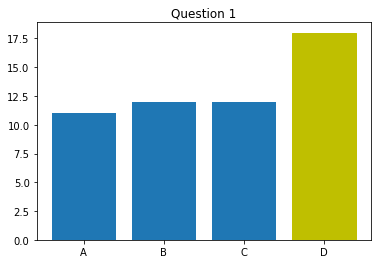

C
Counter({'B': 34, 'C': 12, 'D': 5, 'A': 2})


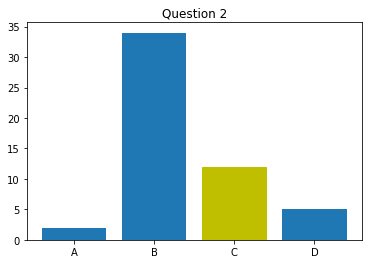

B
Counter({'C': 18, 'B': 15, 'D': 14, 'A': 6})


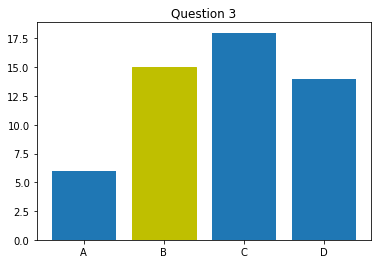

D
Counter({'A': 30, 'D': 10, 'C': 8, 'B': 5})


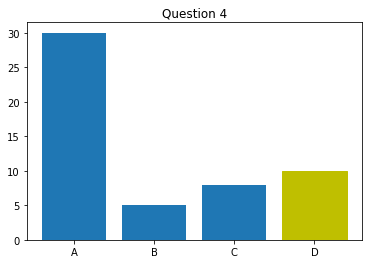

B
Counter({'B': 34, 'A': 8, 'C': 8, 'D': 3})


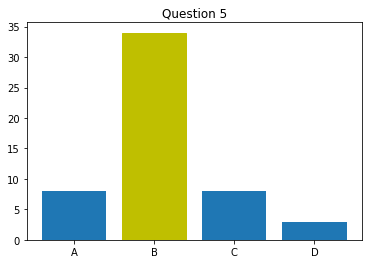

E
Counter({'E': 27, 'B': 10, 'D': 9, 'C': 4, 'A': 3})


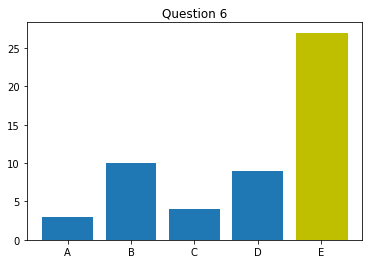

C
Counter({'C': 37, 'A': 15, 'D': 1})


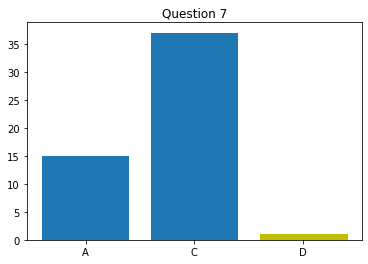

D
Counter({'C': 17, 'D': 16, 'A': 15, 'B': 5})


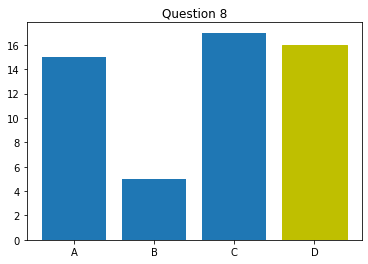

B
Counter({'B': 28, 'A': 14, 'D': 10, 'C': 1})


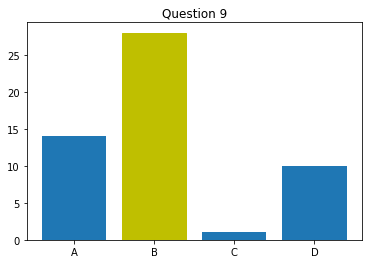

C
Counter({'C': 21, 'B': 16, 'A': 11, 'D': 5})


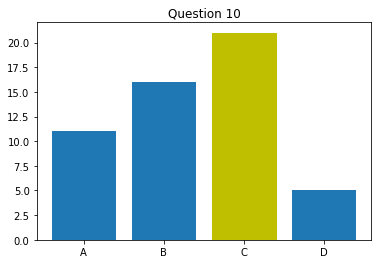

A
Counter({'A': 17, 'D': 14, 'B': 13, 'C': 9})


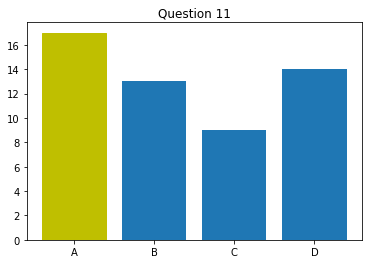

C
Counter({'C': 26, 'A': 19, 'D': 6, 'B': 2})


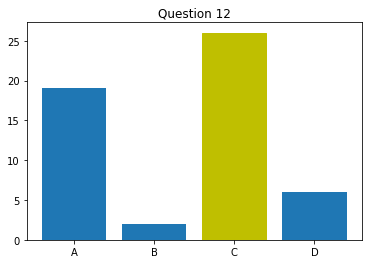

C
Counter({'B': 17, 'C': 17, 'D': 11, 'A': 8})


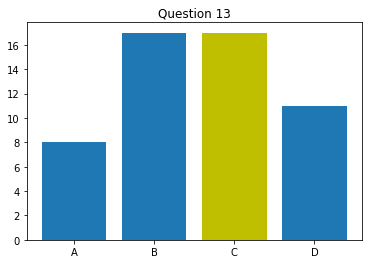

C
Counter({'C': 22, 'D': 19, 'A': 6, 'B': 6})


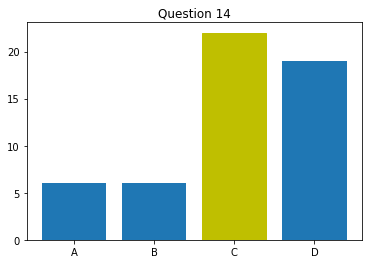

D
Counter({'D': 21, 'A': 14, 'B': 10, 'C': 8})


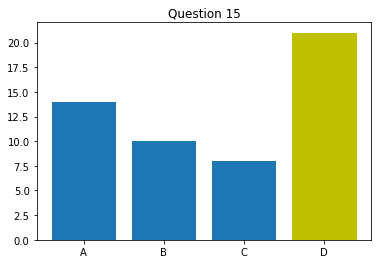

D
Counter({'D': 20, 'C': 13, 'B': 11, 'A': 9})


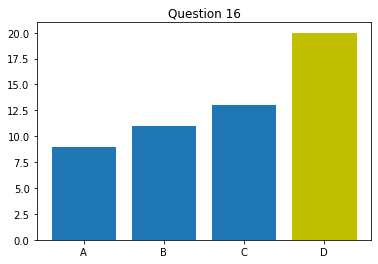

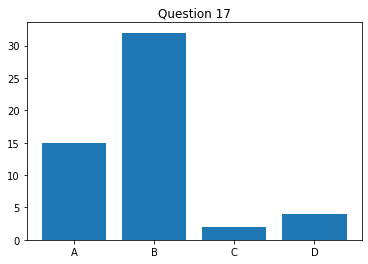

In [198]:
for i in range(17):
    frequencies_plot(i, all_freqs, path=graphs_path+"all_freqs/")

D
Counter({'B': 10, 'D': 10, 'A': 9, 'C': 9})


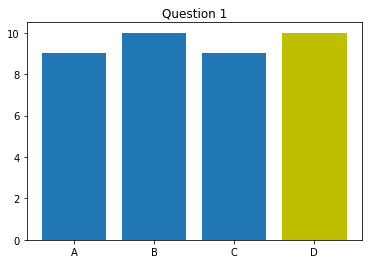

C
Counter({'B': 28, 'C': 7, 'D': 2, 'A': 1})


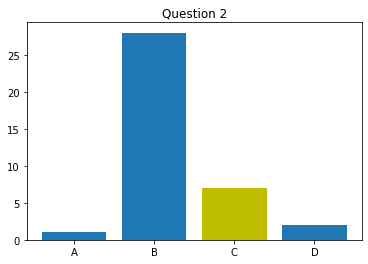

B
Counter({'B': 12, 'C': 11, 'D': 11, 'A': 4})


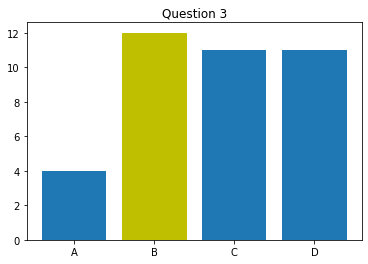

D
Counter({'A': 25, 'D': 7, 'C': 4, 'B': 2})


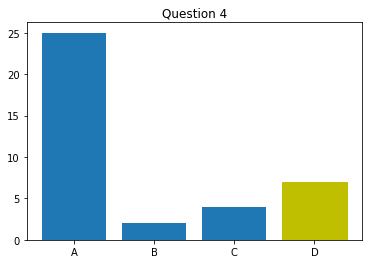

B
Counter({'B': 26, 'A': 5, 'C': 5, 'D': 2})


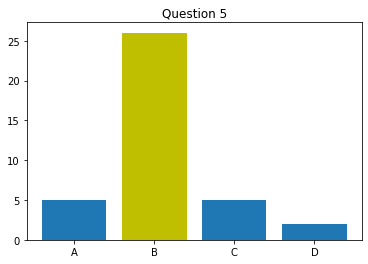

E
Counter({'E': 23, 'B': 7, 'D': 5, 'C': 3})


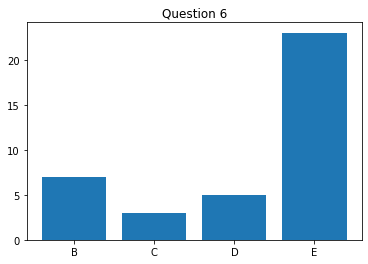

C
Counter({'C': 36, 'A': 2})


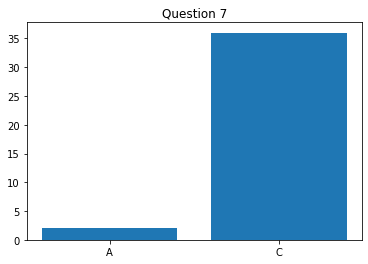

D
Counter({'D': 13, 'C': 12, 'A': 9, 'B': 4})


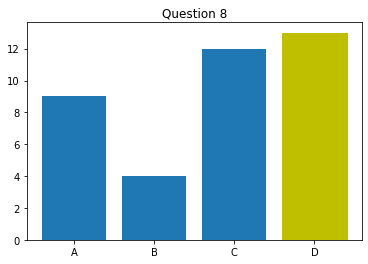

B
Counter({'B': 27, 'A': 7, 'D': 4})


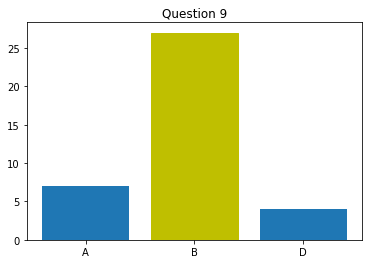

C
Counter({'C': 17, 'B': 12, 'A': 7, 'D': 2})


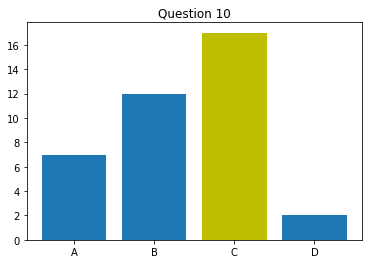

A
Counter({'A': 15, 'B': 11, 'C': 7, 'D': 5})


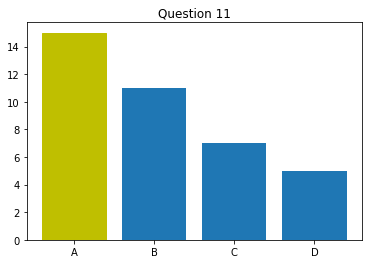

C
Counter({'C': 20, 'A': 13, 'D': 3, 'B': 2})


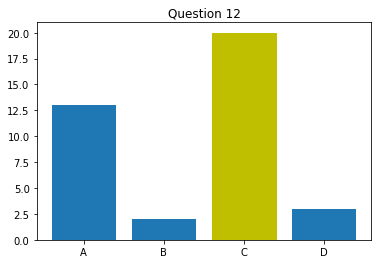

C
Counter({'B': 13, 'D': 11, 'C': 10, 'A': 4})


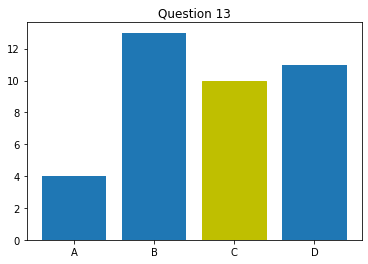

C
Counter({'C': 19, 'D': 12, 'B': 5, 'A': 2})


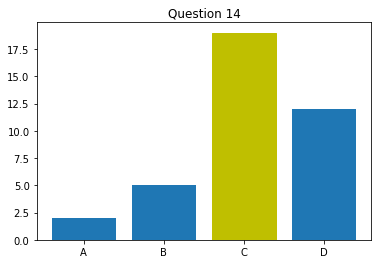

D
Counter({'D': 18, 'A': 8, 'B': 7, 'C': 5})


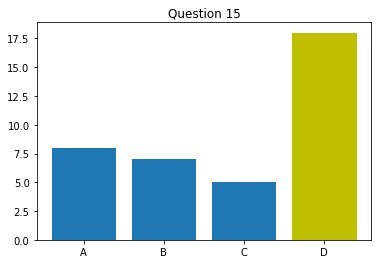

D
Counter({'D': 13, 'C': 10, 'A': 9, 'B': 6})


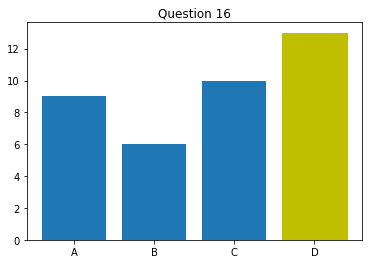

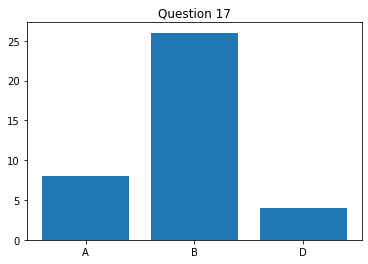

In [199]:
for i in range(17):
    frequencies_plot(i, attentive_freqs, path=graphs_path+"attentive_freqs/")

### Calculate average times for each question and plot them

(array([45.,  8.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <a list of 10 Patch objects>)

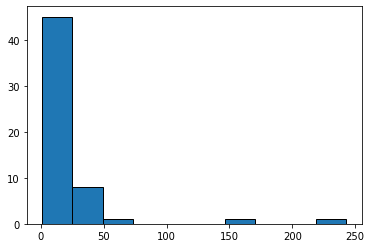

In [35]:
plt.hist(average_times, histtype="bar", ec="black")

In [24]:
np.mean(np.asarray(average_times))

25.5

In [25]:
question = 1
for item in survey[3]["userresponse"]:
    print("Question: ", item.keys())
    #.keys()

Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['question', 'label', 'value', 'rawobj', 'endstamp'])
Question:  dict_keys(['qu

In [26]:
{key: value for key,value in survey[0]["userdata"]["personal"].items() if key != "email"}

{'dev_exp': '2',
 'corrected_vision': 'Normal Vision',
 'color_blind': 'No',
 'language': 'Chinese',
 'usage': ['Laptop'],
 'gender': 'Female',
 'agree': True}